<a href="https://colab.research.google.com/github/FatemeMolaeiJahromi/FatemeMolaeiJahromi/blob/Leishmania-Classification/Trap_Leishmania_Classification_Molaei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install scikit-fuzzy

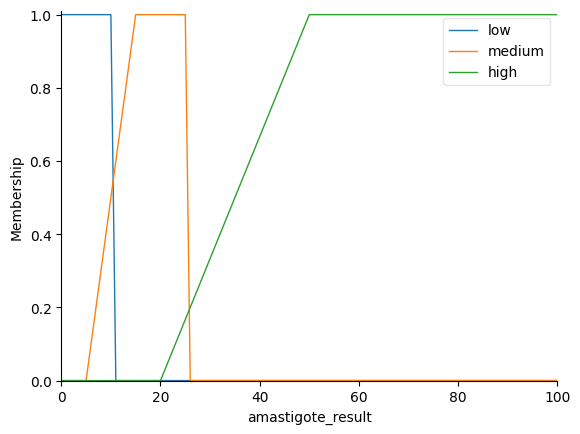

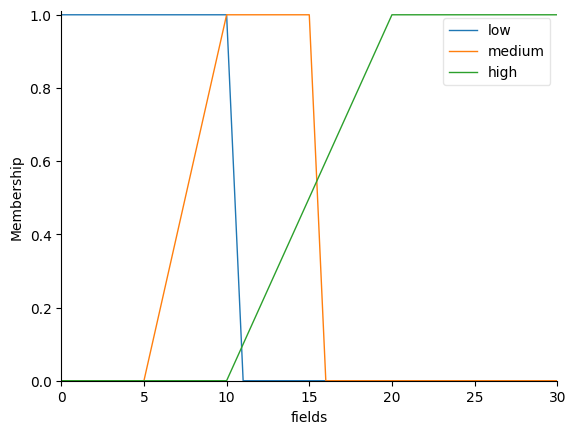

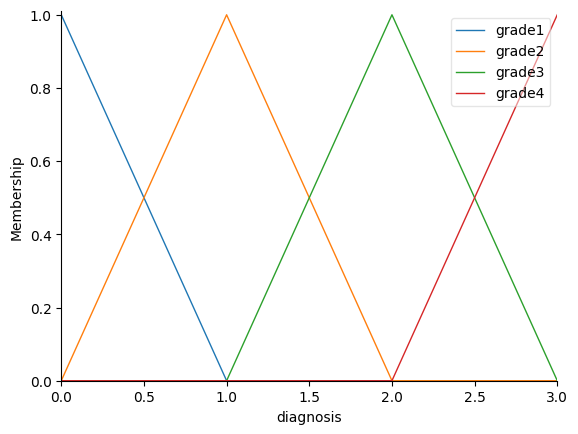

0.9500000000000002


In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
amastigote_result = ctrl.Antecedent(np.arange(0, 101, 1), 'amastigote_result')
fields = ctrl.Antecedent(np.arange(0, 31, 1), 'fields')
diagnosis = ctrl.Consequent(np.arange(0, 4, 1), 'diagnosis')

# Define the fuzzy sets for each variable
amastigote_result['low'] = fuzz.trapmf(amastigote_result.universe, [0, 0, 10, 10])
amastigote_result['medium'] = fuzz.trapmf(amastigote_result.universe, [5, 15, 25, 25])
amastigote_result['high'] = fuzz.trapmf(amastigote_result.universe, [20, 50, 100, 100])

fields['low'] = fuzz.trapmf(fields.universe, [0, 0, 10, 10])
fields['medium'] = fuzz.trapmf(fields.universe, [5, 10, 15, 15])
fields['high'] = fuzz.trapmf(fields.universe, [10, 20, 30, 30])

diagnosis['grade1'] = fuzz.trapmf(diagnosis.universe, [0, 0, 0, 0])
diagnosis['grade2'] = fuzz.trapmf(diagnosis.universe, [1, 1, 1, 1])
diagnosis['grade3'] = fuzz.trapmf(diagnosis.universe, [2, 2, 2, 2])
diagnosis['grade4'] = fuzz.trapmf(diagnosis.universe, [3, 3, 3, 3])

# Step 3.5: Plot the fuzzy membership functions
amastigote_result.view()
fields.view()
diagnosis.view()

# Step 3.6: Show the plots
plt.show()

# Define the fuzzy rules
rule1 = ctrl.Rule(amastigote_result['low'] & fields['high'], diagnosis['grade1'])
rule2 = ctrl.Rule(amastigote_result['medium'] & fields['medium'], diagnosis['grade2'])
rule3 = ctrl.Rule(amastigote_result['high'] & fields['medium'], diagnosis['grade3'])
rule4 = ctrl.Rule(amastigote_result['high'] & fields['high'], diagnosis['grade4'])

# Create the control system
diagnosis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
diagnosis_sim = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Step 4.5: Print the fuzzy rules
print(diagnosis_ctrl.rules)

# Set input values
diagnosis_sim.input['amastigote_result'] = 8
diagnosis_sim.input['fields'] = 12

# Evaluate the control system
diagnosis_sim.compute()

# Print the output
print(diagnosis_sim.output['diagnosis'])

# **This code is Just Written By F.Molaei Jahromi**